In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
def signal_samples(t):
    return (2*np.sin(2*np.pi*t)+3*np.sin(22*2*np.pi*t)+2*np.random.randn(*np.shape(t)))

In [4]:
B = 30.0
f_s = 2*B
delta_f = 0.01
N = int(f_s/delta_f)
T = N/f_s

In [5]:
t = np.linspace(0, T, N)

In [6]:
f_t = signal_samples(t)

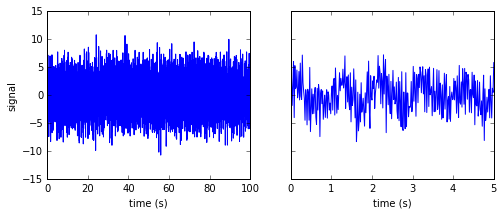

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), sharey=True)
axes[0].plot(t, f_t)
axes[0].set_xlabel("time (s)")
axes[0].set_ylabel("signal")
axes[1].plot(t,f_t)
axes[1].set_xlim(0, 5)
axes[1].set_xlabel("time (s)")

In [8]:
F = fftpack.fft(f_t)

In [9]:
f = fftfreq(N, 1./f_s)
mask = np.where(f>=0)

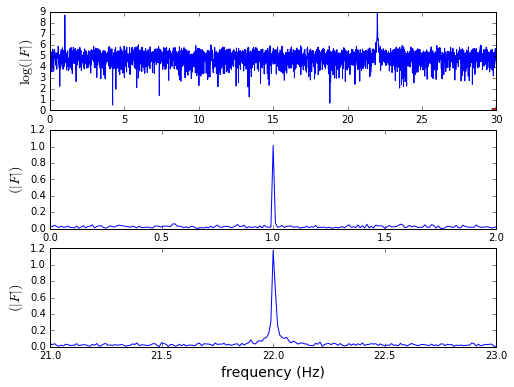

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(8,6))
axes[0].plot(f[mask], np.log(abs(F[mask])), label="real")
axes[0].plot(B, 0, 'r*', markersize=10)
axes[0].set_ylabel("$\log(|F|)$", fontsize=14)
axes[1].plot(f[mask], abs(F[mask])/N, label="real")
axes[1].set_xlim(0, 2)
axes[1].set_ylabel("$(|F|)$", fontsize=14)
axes[2].plot(f[mask], abs(F[mask])/N, label="real")
axes[2].set_xlim(21, 23)
axes[2].set_xlabel("frequency (Hz)", fontsize=14)
axes[2].set_ylabel("$(|F|)$", fontsize=14)

In [11]:
F_filtered = F * (abs(f)<2)
f_t_filtered = fftpack.ifft(F_filtered)

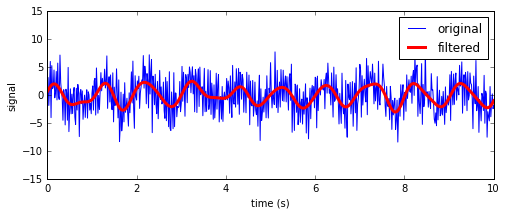

In [12]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, f_t, label="original")
ax.plot(t, f_t_filtered.real, color='red', lw=3, label="filtered")
ax.set_xlim(0, 10)
ax.set_xlabel("time (s)")
ax.set_ylabel("signal")
ax.legend()

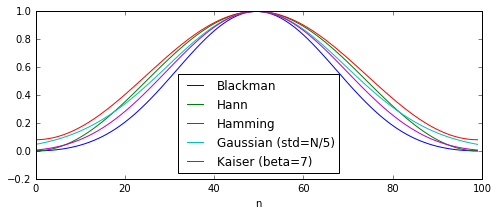

In [14]:
from scipy import signal
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
N = 100
ax.plot(signal.blackman(N), label="Blackman")
ax.plot(signal.hann(N), label="Hann")
ax.plot(signal.hamming(N), label="Hamming")
ax.plot(signal.gaussian(N, N/5), label="Gaussian (std=N/5)")
ax.plot(signal.kaiser(N, 7), label="Kaiser (beta=7)")
ax.set_xlabel("n")
ax.legend(loc=0)

In [22]:
from scipy.io import wavfile
sample_rate, data = wavfile.read("guitar.wav")
data = data.mean(axis=1)
N = int(sample_rate/2.)
f = fftfreq(N, 1.0/sample_rate)
t = linspace(0, 0.5, N)
mask = (f>0)*(f<1000)
subdata = data[:N]
F = fftpack.fft(subdata)

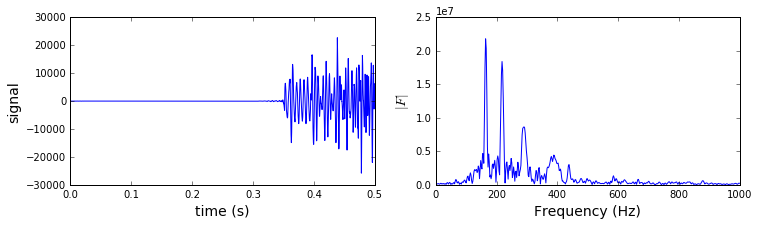

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(t, subdata)
axes[0].set_ylabel("signal", fontsize=14)
axes[0].set_xlabel("time (s)", fontsize=14)
axes[1].plot(f[mask], abs(F[mask]))
axes[1].set_xlim(0, 1000)
axes[1].set_ylabel("$|F|$", fontsize=14)
axes[1].set_xlabel("Frequency (Hz)", fontsize=14)